In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
import experiments

curves = 6
curve_labels = ['Unregularized', 'All Regularizers', 'Data Augment', 'Dropout', 'Weight Decay', 'Random Labels']
curve_colors = ['blue', 'green', 'darkviolet', 'maroon', 'darkorange', 'red']
curve_styles = ['-', '-', '--', '--', '--', '-']
sizes = 5
size_factors = [0.25, 0.5, 1, 2, 4]
size_idx_map = {0.25: 0, 0.5: 1, 1: 2, 2: 3, 4: 4}
size_labels = ['1/4x', '1/2x', '1x', '2x', '4x']
crosses = 3

results = np.zeros((curves, sizes, 3))
results_test = np.zeros((curves, sizes, 3))
# both are indexed [size_factor][nn_type][mean/lowererr/uppererr]
# we have to make sure to not be sketchy and state that these are averages between samplings and not nets

for ID in range(62, 92):

    print('Processing ID:', ID)
    opt = experiments.opt[ID]

    curve_idx = 0  # unregularized
    if opt.dataset.random_labels:
        curve_idx = 5  # random labels
    elif opt.hyper.augmentation and opt.hyper.drop_train < 1:
        curve_idx = 1  # all regularizers
    elif opt.hyper.augmentation:
        curve_idx = 2
    elif opt.hyper.drop_train < 1:
        curve_idx = 3
    elif opt.hyper.weight_decay:
        curve_idx = 4
    size_idx = size_idx_map[opt.dnn.neuron_multiplier[0]]

    csv_file = experiments.opt[ID].csv_dir + experiments.opt[ID].name + '_redundancy.csv'
    df = pd.read_csv(csv_file)
    compressability = np.array([df[df['cross_validation'] == i][df['evaluation_set'] == 'train'][df['layer'] == 'all']
                                ['compressability_95'].iloc[0] for i in range(crosses)])
    compressability_test = np.array(
        [df[df['cross_validation'] == i][df['evaluation_set'] == 'test'][df['layer'] == 'all']
         ['compressability_95'].iloc[0] for i in range(crosses)])
    results[curve_idx, size_idx, 0] = np.mean(compressability)
    results[curve_idx, size_idx, 1] = results[curve_idx, size_idx, 0] - np.min(compressability)
    results[curve_idx, size_idx, 2] = np.max(compressability) - results[curve_idx, size_idx, 0]
    results_test[curve_idx, size_idx, 0] = np.mean(compressability_test)
    results_test[curve_idx, size_idx, 1] = results_test[curve_idx, size_idx, 0] - np.min(compressability_test)
    results_test[curve_idx, size_idx, 2] = np.max(compressability_test) - results_test[curve_idx, size_idx, 0]

results *= 100
results_test *= 100



Processing ID: 62
Processing ID: 63
Processing ID: 64
Processing ID: 65
Processing ID: 66
Processing ID: 67
Processing ID: 68
Processing ID: 69
Processing ID: 70
Processing ID: 71
Processing ID: 72
Processing ID: 73
Processing ID: 74
Processing ID: 75
Processing ID: 76
Processing ID: 77
Processing ID: 78
Processing ID: 79
Processing ID: 80
Processing ID: 81
Processing ID: 82
Processing ID: 83
Processing ID: 84
Processing ID: 85
Processing ID: 86
Processing ID: 87
Processing ID: 88
Processing ID: 89
Processing ID: 90
Processing ID: 91


/cm/shared/openmind/anaconda/2.5.0/lib/python3.5/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


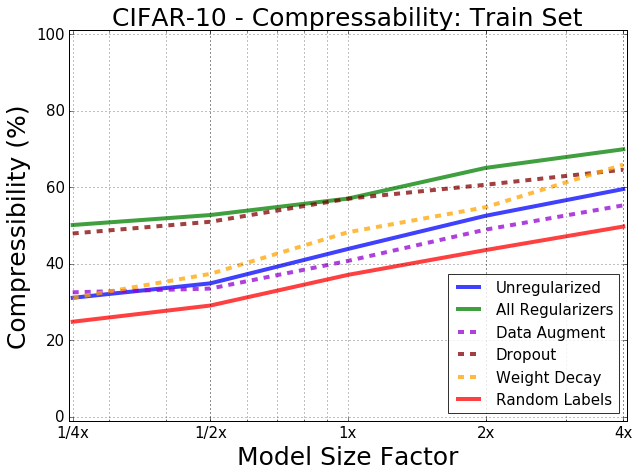

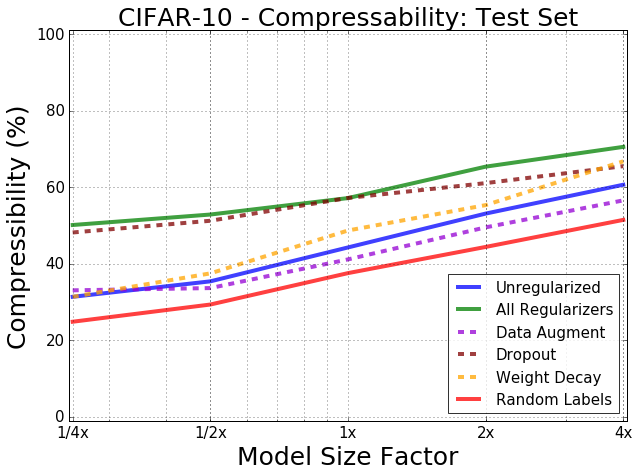

In [10]:
# first plot train curves

% matplotlib inline
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Compressability: Train Set', fontsize=25)
plt.xlabel('Model Size Factor', fontsize=25)
plt.ylabel('Compressibility (%)', fontsize=25)
plt.xlim((0.245, 4.07))
plt.ylim((-1, 101))
plt.grid(True, which='both', c='black')
plt.xscale('log')
plt.xticks(size_factors, size_labels, fontsize=15)
plt.yticks([0, 20, 40, 60, 80, 100], fontsize=15)

for curve_idx in range(curves):
    plt.plot(size_factors, results[curve_idx, :, 0], color=curve_colors[curve_idx], 
             linestyle=curve_styles[curve_idx], linewidth=4, alpha=0.75)
plt.legend(curve_labels, loc='lower right', framealpha=0.8, fontsize=15)

plt.show()

# second plot test curves

plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Compressability: Test Set', fontsize=25)
plt.xlabel('Model Size Factor', fontsize=25)
plt.ylabel('Compressibility (%)', fontsize=25)
plt.xlim((0.245, 4.07))
plt.ylim((-1, 101))
plt.grid(True, which='both', c='black')
plt.xscale('log')
plt.xticks(size_factors, size_labels, fontsize=15)
plt.yticks([0, 20, 40, 60, 80, 100], fontsize=15)

for curve_idx in range(curves):
    plt.plot(size_factors, results_test[curve_idx, :, 0], color=curve_colors[curve_idx], 
             linestyle=curve_styles[curve_idx], linewidth=4, alpha=0.75)
plt.legend(curve_labels, loc='lower right', framealpha=0.8, fontsize=15)

plt.show()
